In [55]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [56]:
# Load your dataset of cities with their coordinates
def load_dataset(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data
filename = "dataset/large.csv"
cities = load_dataset(filename)
num_cities = len(cities)

In [57]:
# Calculate Euclidean distance between two cities to use it to calc the total distance later on 
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

In [58]:
# function that find the nearest neighbor for a city 
def nearest_neighbor_initial_route(cities, start_city):
    num_cities = len(cities)
    current_city = start_city
    unvisited_cities = set(range(num_cities))
    route = [current_city]
    unvisited_cities.remove(current_city)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[current_city], cities[city]))
        route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city
    
    return route


In [59]:
def total_distance(route, cities):
    total = 0
    num_cities = len(route)
    for i in range(num_cities):
        total += distance(cities[route[i]], cities[route[(i+1) % num_cities]])
    total += distance(cities[route[-1]], cities[route[0]])
    return total


In [60]:
class Particle:
    def __init__(self, initial_route):
        self.position = initial_route
        self.velocity = [0] * len(initial_route)
        self.best_position = initial_route
        self.best_fitness = total_distance(initial_route, cities)


def initialize_particles(num_particles):
    particles = []
    num_cities = len(cities)
    city_indices = list(range(num_cities))  # Create a list of city indices
    random.shuffle(city_indices)  # Shuffle the city indices

    for i in range(num_particles):
        start_city_index = city_indices[i % num_cities]  # Ensure that each particle gets a unique start city
        initial_route = nearest_neighbor_initial_route(cities, start_city_index)
        particle = Particle(initial_route)
        particles.append(particle)
    return particles


def initialize_particles(num_particles, initialization_approach='random'):
    particles = []
    num_cities = len(cities)
    city_indices = list(range(num_cities))  # Create a list of city indices
    random.shuffle(city_indices)  # Shuffle the city indices

    for i in range(num_particles):
        if initialization_approach == 'random':
            initial_route = random.sample(range(num_cities), num_cities)
        elif initialization_approach == 'nearest_neighbor':
            start_city_index = city_indices[i % num_cities]  # Ensure that each particle gets a unique start city
            initial_route = nearest_neighbor_initial_route(cities, start_city_index)
        else:
            raise ValueError("Invalid initialization approach. Choose from 'random' or 'nearest_neighbor'.")

        particle = Particle(initial_route)
        particles.append(particle)
    return particles


def update_velocity(particle, global_best_position, inertia_weight, cognitive_weight, social_weight):
    for i in range(len(particle.position)):
        cognitive_component = cognitive_weight * random.random() * (particle.best_position[i] - particle.position[i])
        social_component = social_weight * random.random() * (global_best_position[i] - particle.position[i])
        particle.velocity[i] = inertia_weight * particle.velocity[i] + cognitive_component + social_component


def update_position(particle):
    num_cities = len(particle.position)
    for i in range(num_cities):
        # Update position based on velocity
        particle.position[i] = (particle.position[i] + int(round(particle.velocity[i]))) % num_cities


def crowding_penalty(particles, crowding_factor):
    num_particles = len(particles)
    num_dimensions = len(particles[0].position)
    
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            distance_ij = sum((particles[i].position[d] - particles[j].position[d]) ** 2 for d in range(num_dimensions)) ** 0.5
            crowding_penalty_ij = max(0, 1 - distance_ij / crowding_factor)
            
            # Reduce fitness of particles based on crowding penalty
            particles[i].fitness *= crowding_penalty_ij
            particles[j].fitness *= crowding_penalty_ij

def pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight, crowding_factor,intia_type):
    particles = initialize_particles(num_particles,intia_type)
    global_best_position = min(particles, key=lambda p: p.best_fitness).best_position
    global_best_fitness = total_distance(global_best_position, cities)

    for _ in range(max_iterations):
        # Evaluate fitness
        for particle in particles:
            particle.fitness = 1 / (total_distance(particle.position, cities) + 1)  # Add 1 to avoid division by zero
        
        # Apply crowding penalty
        crowding_penalty(particles, crowding_factor)
        
        for particle in particles:
            update_velocity(particle, global_best_position, inertia_weight, cognitive_weight, social_weight)
            update_position(particle)
            current_fitness = total_distance(particle.position, cities)

            # Update personal best if necessary
            if current_fitness < particle.best_fitness:
                particle.best_fitness = current_fitness
                particle.best_position = particle.position

            # Update global best if necessary
            if current_fitness < global_best_fitness:
                global_best_fitness = current_fitness
                global_best_position = particle.position

    return global_best_position, global_best_fitness




In [61]:
 # loading the dataset

filename = "dataset/large.csv" 
cities = load_dataset(filename)   


In [62]:
# import numpy as np
# import random
# import matplotlib.pyplot as plt

# # Load dataset function remains the same

# # Function to control/tune parameters
# def tune_parameters(num_particles_values, max_iterations_values, inertia_weight_values, cognitive_weight_values, social_weight_values, crowding_factor_values):
#     best_distance = float('inf')
#     best_parameters = None

#     for num_particles in num_particles_values:
#         for max_iterations in max_iterations_values:
#             for inertia_weight in inertia_weight_values:
#                 for cognitive_weight in cognitive_weight_values:
#                     for social_weight in social_weight_values:
#                         for crowding_factor in crowding_factor_values:
#                             # Use PSO algorithm with current parameter configuration
#                             _, distance = pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight, crowding_factor, "nearest_neighbor")
                            
#                             # Update best parameters if a better solution is found
#                             if distance < best_distance:
#                                 best_distance = distance
#                                 best_parameters = {
#                                     'num_particles': num_particles,
#                                     'max_iterations': max_iterations,
#                                     'inertia_weight': inertia_weight,
#                                     'cognitive_weight': cognitive_weight,
#                                     'social_weight': social_weight,
#                                     'crowding_factor': crowding_factor
#                                 }
    
#     return best_parameters, best_distance


# # Example values to tune parameters
# num_particles_values = [10, 20, 30]
# max_iterations_values = [50, 100, 150]
# inertia_weight_values = [0.5, 0.7, 0.9]
# cognitive_weight_values = [1.0, 1.5, 2.0]
# social_weight_values = [1.0, 1.5, 2.0]
# crowding_factor_values = [5, 10, 15]

# # Tune parameters
# best_parameters, best_distance = tune_parameters(num_particles_values, max_iterations_values, inertia_weight_values, cognitive_weight_values, social_weight_values, crowding_factor_values)

# # Print best parameters and distance
# print("Best parameters:", best_parameters)
# print("Best distance:", best_distance)


# # Now you can use the best_parameters to run the PSO algorithm with optimized parameters and get the best route and distance.


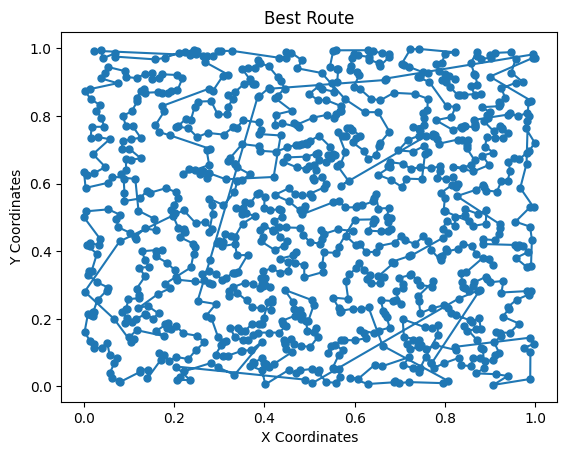

Best route found: [264 194 714 ... 259 769 264]
Distance of the best route: 28.140147425993725


In [63]:
# We here set the intialization particles method to be nearest_neighbor to see the output the algorithm will give and then see how it will do with other intilization method ( random )
# and particles to be 20 

num_particles = 20                 # Setting the number of populations 
max_iterations = 100               # Setting the number of iterations
inertia_weight = 0.7               # Setting the inertia weight
cognitive_weight = 1.5             # Setting the Cognitive weight
social_weight = 1.5                # Setting the social weight
crowding_factor = 10               # parameter to control the strength of crowding


# Using PSO algo with using nearest neighbor to help intializing smarter particles routes to start with 
best_route, best_distance = pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight,crowding_factor,"nearest_neighbor")

#Concatenate the first city to the end to form a closed loop
best_route = np.array(best_route)
best_route = np.append(best_route, best_route[0])

with open("./image/best_routePSo.txt", "w") as f:

    f.write("Distance: {}".format(best_distance))
    
# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.savefig('./image/best_routePSo.png')
plt.show()

print("Best route found:", best_route)
print("Distance of the best route:", best_distance)

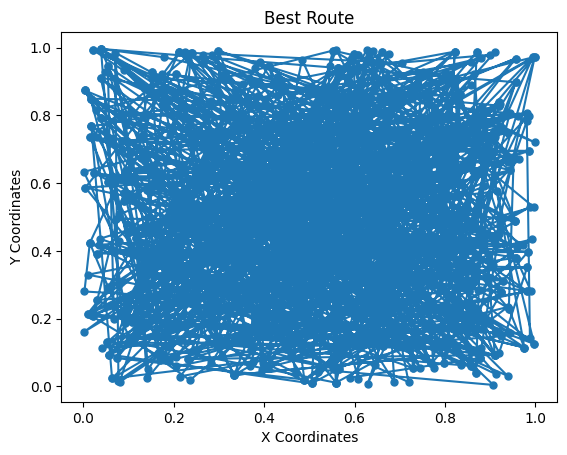

Best route found: [600 916 854 ... 370 648 600]
Distance of the best route: 490.38212273601374


In [64]:
# This time we set the intialization particles method to be random to see the effect it does on the algorithm
# and particles to be 20 


num_particles = 20                 # Setting the number of populations 
max_iterations = 100               # Setting the number of iterations
inertia_weight = 0.7               # Setting the inertia weight
cognitive_weight = 1.5             # Setting the Cognitive weight
social_weight = 1.5                # Setting the social weight
crowding_factor = 10               # parameter to control the strength of crowding


# Using PSO algo with using random intializing to see how much of differnt it will make to our algorithm output
best_route, best_distance = pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight,crowding_factor,"random")

#Concatenate the first city to the end to form a closed loop
best_route = np.array(best_route)
best_route = np.append(best_route, best_route[0])

# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.show()

print("Best route found:", best_route)
print("Distance of the best route:", best_distance)

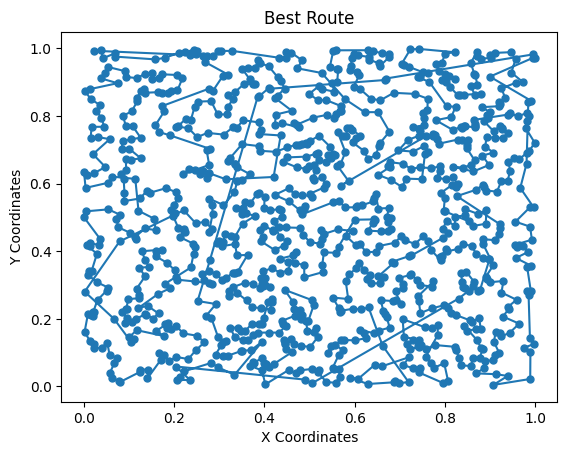

Best route found: [218 312 446 ... 259 769 218]
Distance of the best route: 27.62488794822353


In [65]:
# This time we set the number of particles to be 100 to see the effect of large population
# and particles to be 20 


num_particles = 100                 # Setting the number of populations 
max_iterations = 100               # Setting the number of iterations
inertia_weight = 0.7               # Setting the inertia weight
cognitive_weight = 1.5             # Setting the Cognitive weight
social_weight = 1.5                # Setting the social weight
crowding_factor = 10               # parameter to control the strength of crowding


# Using PSO algo with using random intializing to see how much of differnt it will make to our algorithm output
best_route, best_distance = pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight,crowding_factor,"nearest_neighbor")

#Concatenate the first city to the end to form a closed loop
best_route = np.array(best_route)
best_route = np.append(best_route, best_route[0])

# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.show()

print("Best route found:", best_route)
print("Distance of the best route:", best_distance)